<a href="https://colab.research.google.com/github/sejii93/Probability-Model/blob/main/Exponential_Smoothing_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/probability model/Passenger data_intl_2019.csv',parse_dates=['date'],index_col='date')
                 
df.head(5)

,Intl pax
date,
2019-01-01,1183719
2019-02-01,1070895
2019-03-01,1129962
2019-04-01,1156786
2019-05-01,1161847


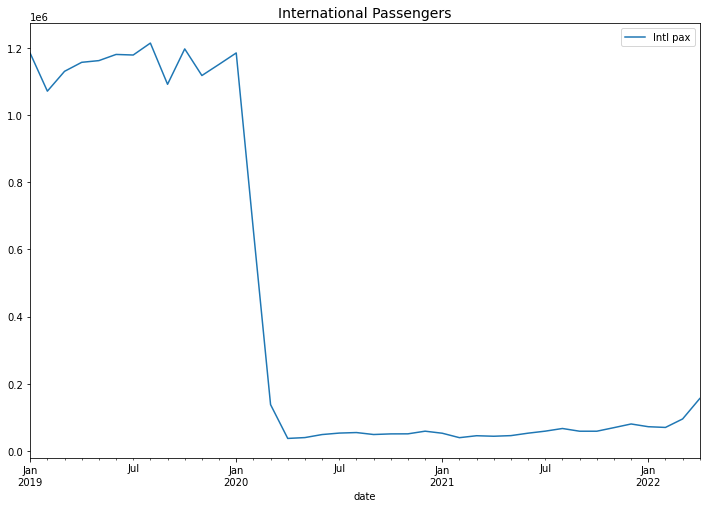

In [4]:
## time series plot
df.plot(figsize=[12,8])
plt.title('International Passengers', fontsize=14)
plt.show()

In [7]:
## split between the training and the test data sets. 
## The last 12 periods form the test data
df_train = df.iloc[:]
#df_test = df.iloc[-12:]

In [8]:
## exponential smoothing in Python
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [9]:
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(df_train,).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [10]:
# Trend
fit2 = Holt(df_train).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [11]:
# Exponential trend
fit3 = Holt(df_train,exponential=True).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [12]:
## accessing the results of SimpleExpSmoothing Model
print(fit1.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                   40
Model:             SimpleExpSmoothing   SSE                   616871689062.000
Optimized:                       True   AIC                            942.362
Trend:                           None   BIC                            945.740
Seasonal:                        None   AICC                           943.505
Seasonal Periods:                None   Date:                 Tue, 31 May 2022
Box-Cox:                        False   Time:                         09:31:34
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial_level             1.1837e+06                

In [13]:
## accessing the results of 
print(fit2.summary())

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                   40
Model:                           Holt   SSE                   616949020557.322
Optimized:                       True   AIC                            946.367
Trend:                       Additive   BIC                            953.122
Seasonal:                        None   AICC                           948.912
Seasonal Periods:                None   Date:                 Tue, 31 May 2022
Box-Cox:                        False   Time:                         09:31:38
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_slope            0.1540500                

In [14]:
## accessing the results of 
print(fit3.summary())

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                   40
Model:                           Holt   SSE                   523813848383.566
Optimized:                       True   AIC                            939.821
Trend:                 Multiplicative   BIC                            946.576
Seasonal:                        None   AICC                           942.366
Seasonal Periods:                None   Date:                 Tue, 31 May 2022
Box-Cox:                        False   Time:                         09:31:42
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_slope            0.7602953                

In [15]:
## Holt's Winters's method for time series data with Seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [16]:
# additive model for fixed seasonal variation
fit6 = HWES(df_train, 
             seasonal_periods=12, 
             trend='add', 
             seasonal='add').fit(optimized=True, use_brute=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [17]:
# multiplicative model for increasing seasonal variation
fit7 = HWES(df_train, 
             seasonal_periods=12, 
             trend='add', 
             seasonal='mul').fit(optimized=True, use_brute=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [18]:
## accessing the results of 
print(fit6.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   40
Model:             ExponentialSmoothing   SSE                   622189931552.022
Optimized:                         True   AIC                            970.705
Trend:                         Additive   BIC                            997.727
Seasonal:                      Additive   AICC                          1003.277
Seasonal Periods:                    12   Date:                 Tue, 31 May 2022
Box-Cox:                          False   Time:                         09:32:01
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_slope          

In [19]:
## accessing the results of 
print(fit7.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   40
Model:             ExponentialSmoothing   SSE                   340549795004.580
Optimized:                         True   AIC                            946.598
Trend:                         Additive   BIC                            973.620
Seasonal:                Multiplicative   AICC                           979.169
Seasonal Periods:                    12   Date:                 Tue, 31 May 2022
Box-Cox:                          False   Time:                         09:32:04
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_slope          

In [20]:
## forecasting for 12 months
forecast_1 = fit1.forecast(12)
forecast_2 = fit2.forecast(12)
forecast_3 = fit3.forecast(12)
forecast_6 = fit6.forecast(12)
forecast_7 = fit7.forecast(12)

In [ ]:
y_test = df_test['Intl pax']

t_p = pd.DataFrame({'test': y_test, 
                    'f1': forecast_1, 
                    'f2': forecast_2, 
                    'f3': forecast_3, 
                    'f6': forecast_6, 
                    'f7': forecast_7})    

In [ ]:
print(t_p)

                                   test  f1  f2  f3  f6  f7
1970-01-01 00:00:00.000000111       NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000112       NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000113       NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000114       NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000115       NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000116       NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000117       NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000118       NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000119       NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000120       NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000121       NaN NaN NaN NaN NaN NaN
1970-01-01 00:00:00.000000122       NaN NaN NaN NaN NaN NaN
2021-05-01 00:00:00.000000000   45412.0 NaN NaN NaN NaN NaN
2021-06-01 00:00:00.000000000   52687.0 NaN NaN NaN NaN NaN
2021-07-01 00:00:00.000000000   58725.0 NaN NaN NaN NaN NaN
2021-08-01 00:00:00.000000000   66617.0 

In [ ]:
## UDF for counting the number of parameters in model
def num_params(model):
    n_params = 0

    for p in list(model.params.values()):
        if isinstance(p, np.ndarray):
            n_params += len(p)
            #print(p)
        elif p in [np.nan, False, None]:
            pass
        elif np.isnan(float(p)):
            pass
        else:
            n_params += 1
            #print(p)
    
    return n_params

In [ ]:
num_params(fit1)
#모든 모델의 갯수를 나타내자

2

In [ ]:
## number of observations in training set
T = df_train.shape[0]
print(T)

111


In [ ]:
## evaluation metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [ ]:
# Mean Absolute Percentage Error
def SSE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.sum((y_test - y_pred)**2)

def ME(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(y_test - y_pred)

def RMSE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.sqrt(np.mean((y_test - y_pred)**2))   
    #return np.sqrt(MSE(y_test - y_pred))

def MPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean((y_test - y_pred) / y_test) * 100

def MAPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def AIC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return T * np.log(sse/T) + 2*k

def SBC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return T * np.log(sse/T) + k * np.log(T)

def APC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return ((T+k)/(T-k)) * sse / T

def ADJ_R2(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sst = np.sum((y_test - np.mean(y_test))**2)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    r2 = 1 - sse/sst
    return 1 - ((T - 1)/(T - k)) * (1 - r2)

In [ ]:
## Combining all metrics together
def eval_all(y_test, y_pred, T, model):
    sse = SSE(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    me = ME(y_test, y_pred)
    mae = MAE(y_test, y_pred)
    mpe = MPE(y_test, y_pred)
    mape = MAPE(y_test, y_pred)
    aic = AIC(y_test, y_pred, T, model)
    sbc = SBC(y_test, y_pred, T, model)
    apc = APC(y_test, y_pred, T, model)
    adj_r2 = ADJ_R2(y_test, y_pred, T, model)
    
    return [sse, mse, rmse, me, mae, mpe, mape, aic, sbc, apc, adj_r2]

In [ ]:
eval_all_df = pd.DataFrame(
    {'SES': eval_all(y_test, forecast_1, T, fit1), 
    "Holt's": eval_all(y_test, forecast_2, T, fit2), 
    'Exponential': eval_all(y_test, forecast_3, T, fit3), 
    'Trend_Season_Add': eval_all(y_test, forecast_6, T, fit6), 
    'Trend_Season_Mult': eval_all(y_test, forecast_7, T, fit7)}
    , index=['SSE', 'MSE', 'RMSE', 'ME', 'MAE', 'MPE', 'MAPE', 'AIC', 'SBC', 'APC', 'Adj_R2'])

In [ ]:
print(eval_all_df)

                 SES        Holt's   Exponential  Trend_Season_Add  \
SSE     2.006251e+10  2.006251e+10  2.268217e+10      2.555768e+11   
MSE     1.671876e+09  1.671876e+09  1.890181e+09      2.129807e+10   
RMSE    4.088857e+04  4.088857e+04  4.347621e+04      1.459386e+05   
ME      2.998292e+04  2.998292e+04  3.254113e+04      9.080384e+04   
MAE     2.998292e+04  2.998292e+04  3.254113e+04      9.660205e+04   
MPE     3.491701e+01  3.491701e+01  3.827774e+01      9.943373e+01   
MAPE    3.491701e+01  3.491701e+01  3.827774e+01      1.091463e+02   
AIC     2.114397e+03  2.114397e+03  2.130020e+03      2.426856e+03   
SBC     2.119816e+03  2.119816e+03  2.138149e+03      2.472918e+03   
APC     1.873761e+08  1.873761e+08  2.156963e+08      3.135310e+09   
Adj_R2 -1.182965e+00 -1.182965e+00 -1.490857e+00     -3.124642e+01   

        Trend_Season_Mult  
SSE          4.107856e+12  
MSE          3.423213e+11  
RMSE         5.850823e+05  
ME           1.654393e+05  
MAE          3.7763

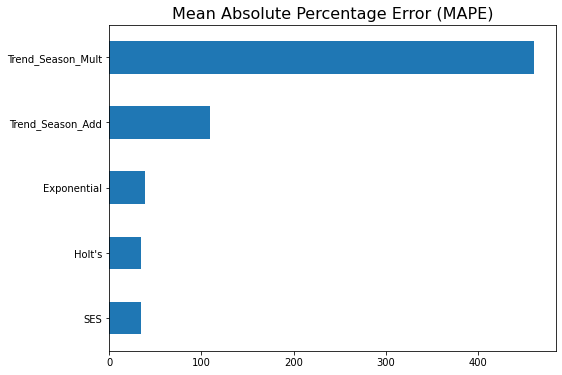

In [ ]:
# horizontal bar chart
eval_all_df.loc['MAPE', :].plot(kind='barh', figsize=[8, 6])
plt.title('Mean Absolute Percentage Error (MAPE)', fontsize=16)
plt.show()

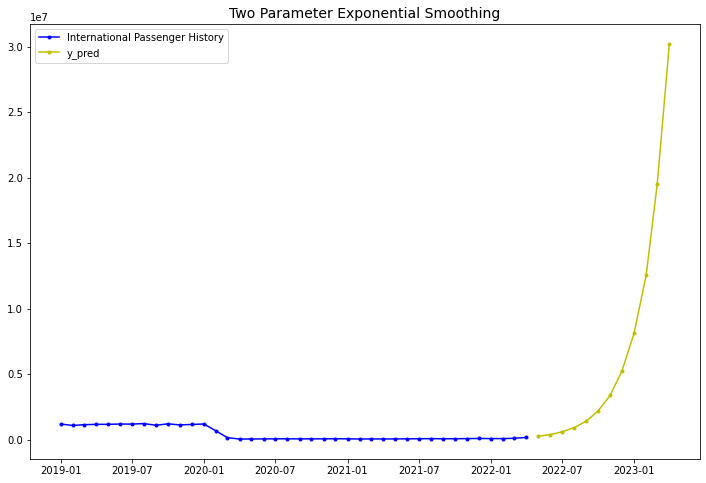

In [25]:
# 1차 선형 추세는 있고 계절성은 없는 이중 지수 평활법
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='International Passenger History')
#test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(forecast_3.index, forecast_3, 'y.-', label='y_pred')
plt.title('Two Parameter Exponential Smoothing', fontsize=14)
plt.legend(handles=[past,pred])
plt.show()

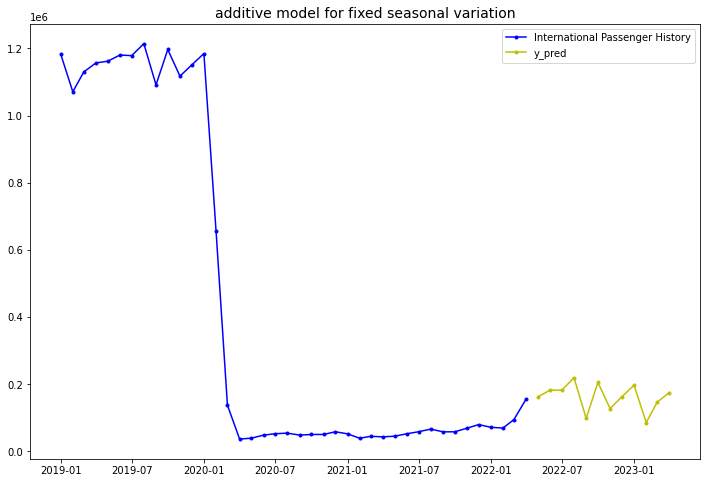

In [28]:
# forecast_6
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='International Passenger History')
#test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(forecast_6.index, forecast_6, 'y.-', label='y_pred')
plt.title('additive model for fixed seasonal variation', fontsize=14)
plt.legend(handles=[past, pred])
plt.show()

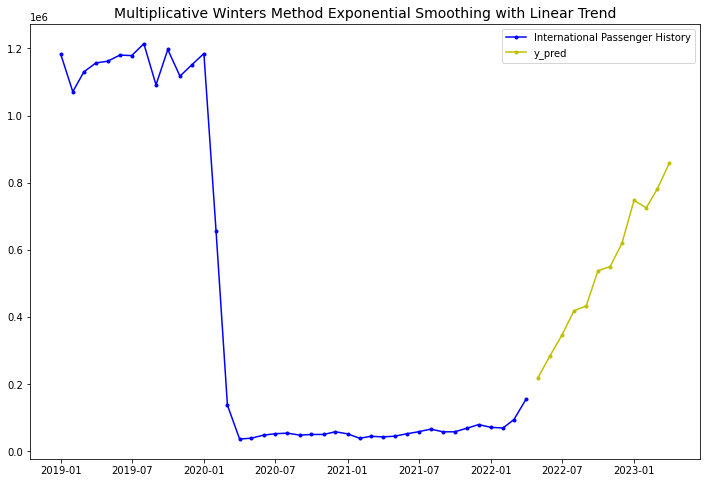

In [27]:
# 1차 선형 추세와 확산계절변동이 있는 승법 윈터스 지수평활법
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='International Passenger History')
#test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(forecast_7.index, forecast_7, 'y.-', label='y_pred')
plt.title('Multiplicative Winters Method Exponential Smoothing with Linear Trend', fontsize=14)
plt.legend(handles=[past, pred])
plt.show()

In [ ]:
#print out the training summary
print(fit7.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  111
Model:             ExponentialSmoothing   SSE                  1098555354066.226
Optimized:                         True   AIC                           2586.719
Trend:                         Additive   BIC                           2630.072
Seasonal:                Multiplicative   AICC                          2594.154
Seasonal Periods:                    12   Date:                 Tue, 31 May 2022
Box-Cox:                          False   Time:                         06:29:06
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7368421                alpha                 True
smoothing_slope          